In [1]:
# 경고문 출력 해제
import warnings # ignore, default
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd

df_left = pd.DataFrame({'KEY': ['Key0', 'Key1', 'Key2', 'Key3'],\

'사용자': ['홍길동', '이순자', '왕서방', '영심이'],

'치수': [0.5, 2.2, 3.6, 0.4]})

df_right = pd.DataFrame({'KEY': ['Key2', 'Key3', 'Key4', 'Key5'],\

'CType': ['C2', 'C3', 'C4', 'C5'],\

'Dtype': ['D2', 'D3', 'D4', 'D5']})


df_all = pd.merge(df_left, df_right, how='outer', on='KEY') # on 기준 열

df_all

,KEY,사용자,치수,CType,Dtype
0,Key0,홍길동,0.5,NaN,NaN
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,영심이,0.4,C3,D3
4,Key4,NaN,NaN,C4,D4
5,Key5,NaN,NaN,C5,D5


In [7]:
# 사용자 => User, 치수 => Size
df_all.columns = ['KEY', 'User', 'Size', 'CType', 'DType']
df_all

,KEY,User,Size,CType,DType
0,Key0,홍길동,0.5,NaN,NaN
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,영심이,0.4,C3,D3
4,Key4,NaN,NaN,C4,D4
5,Key5,NaN,NaN,C5,D5


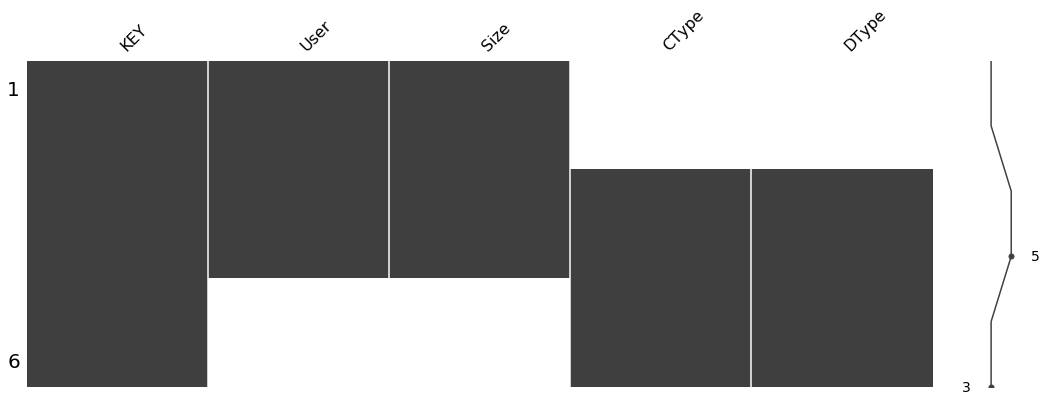

In [9]:
import missingno as msno
msno.matrix(df_all,figsize=(18,6))

In [10]:
df_all.isnull().sum()

KEY      0
User     2
Size     2
CType    2
DType    2
dtype: int64

In [11]:
df_all.notnull() # true, false

,KEY,User,Size,CType,DType
0,True,True,True,False,False
1,True,True,True,False,False
2,True,True,True,True,True
3,True,True,True,True,True
4,True,False,False,True,True
5,True,False,False,True,True


In [12]:
df_all.notnull().sum() # 큰 의미는 없음

KEY      6
User     4
Size     4
CType    4
DType    4
dtype: int64

In [13]:
df_all.isnull().sum(1) # row 단위의 결측값을 구한다

0    2
1    2
2    0
3    0
4    2
5    2
dtype: int64

In [19]:
df_all.describe() # *** 수치형 요약정보를 확인

"""
min : 0 사분위, 최소값
25% : 1 사분위, 25% 지점
50% : 2 분위수, 중앙값(median)
75% : 3 사분위
max : 4 사분위, 최대값
"""

,Size
count,4.000000
mean,1.675000
std,1.526161
min,0.400000
25%,0.475000
50%,1.350000
75%,2.550000
max,3.600000


In [15]:
import numpy as np

In [20]:
np.percentile(df_all['Size'],25)

nan

In [23]:
# 백분위수 : 오름차순으로 정렬 0을 최소값, 100을 최대값
# 사분위수 : 데이터를 작은 수부터 큰 수까지 커지는 순서대로
# 1/4, 2/4, 3/4 ... 수를 이야기 함
# null 이 존재하면 계산을 할 수가 없다.

In [21]:
data = np.arange(1,11)

In [22]:
data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
# 최소값
np.percentile(data,0)

1.0

In [25]:
# 25%
np.percentile(data,25)

3.25

In [26]:
# 50%
np.percentile(data,50)

5.5

In [27]:
# 75%
np.percentile(data,75)

7.75

In [28]:
# 최대값
np.percentile(data,100)

10.0

In [29]:
# 한꺼번에 나타내기
np.percentile(data, [0, 25, 50, 75, 100])

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

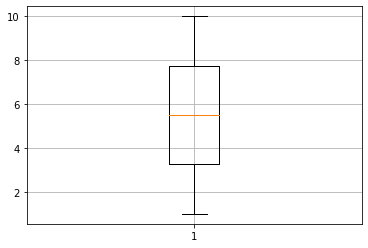

In [32]:
# 시각화 상자수염,
# 시각화에서 제공하는 그래프를 가지고 있는 라이브러리
import matplotlib.pyplot as plt
plt.grid(True)
plt.boxplot(data)
plt.show()

In [33]:
# 임의적으로 NaN 생성하기
data1 = pd.Series(np.arange(1,10))
data1[3] = float('nan')
data1

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
5    6.0
6    7.0
7    8.0
8    9.0
dtype: float64

In [34]:
df_all['Size']

0    0.5
1    2.2
2    3.6
3    0.4
4    NaN
5    NaN
Name: Size, dtype: float64

In [38]:
# NaN 처리하는 방법, fill_na, drop_na
df_all['Size'] = df_all['Size'].fillna(0) # NaN 이 0으로 치환됨

In [37]:
df_all['Size']

0    0.5
1    2.2
2    3.6
3    0.4
4    0.0
5    0.0
Name: Size, dtype: float64

In [39]:
np.percentile(df_all['Size'], [0, 25, 50, 75, 100])

array([0.   , 0.1  , 0.45 , 1.775, 3.6  ])

In [40]:
df_all['Size'].describe()

count    6.000000
mean     1.116667
std      1.464809
min      0.000000
25%      0.100000
50%      0.450000
75%      1.775000
max      3.600000
Name: Size, dtype: float64

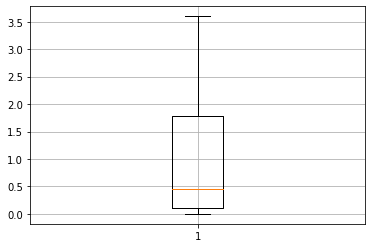

In [47]:
plt.grid(True)
plt.boxplot(df_all['Size'])
plt.show()

In [46]:
import pandas as pd

def make_dfall():

    df_left = pd.DataFrame({'KEY': ['Key0', 'Key1', 'Key2', 'Key3'],\

    '사용자': ['홍길동', '이순자', '왕서방', '영심이',],

    '치수': [0.5, 2.2, 3.6, 0.4]})

    df_right = pd.DataFrame({'KEY': ['Key2', 'Key3', 'Key4', 'Key5'],\

    'CType': ['C2', 'C3', 'C4', 'C5'],\

    'Dtype': ['D2', 'D3', 'D4', 'D5']})

    df_all = pd.merge(df_left, df_right, how='outer', on='KEY') # on 기준 열 

    return df_all


make_dfall()

,KEY,사용자,치수,CType,Dtype
0,Key0,홍길동,0.5,NaN,NaN
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,영심이,0.4,C3,D3
4,Key4,NaN,NaN,C4,D4
5,Key5,NaN,NaN,C5,D5


In [48]:
df_all = make_dfall()
df_all

,KEY,사용자,치수,CType,Dtype
0,Key0,홍길동,0.5,NaN,NaN
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,영심이,0.4,C3,D3
4,Key4,NaN,NaN,C4,D4
5,Key5,NaN,NaN,C5,D5


In [49]:
# NaN 제거하기
df_all = df_all[['치수', 'CType']].dropna()

In [50]:
df_all

,치수,CType
2,3.6,C2
3,0.4,C3


In [51]:
df_all = make_dfall()
df_all

,KEY,사용자,치수,CType,Dtype
0,Key0,홍길동,0.5,NaN,NaN
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,영심이,0.4,C3,D3
4,Key4,NaN,NaN,C4,D4
5,Key5,NaN,NaN,C5,D5


In [52]:
df_all.dropna(axis=0) # 결측치가 들어있는 행 전체를 삭제, 0 행기준, 1 열기준

,KEY,사용자,치수,CType,Dtype
2,Key2,왕서방,3.6,C2,D2
3,Key3,영심이,0.4,C3,D3


In [53]:
df_all

,KEY,사용자,치수,CType,Dtype
0,Key0,홍길동,0.5,NaN,NaN
1,Key1,이순자,2.2,NaN,NaN
2,Key2,왕서방,3.6,C2,D2
3,Key3,영심이,0.4,C3,D3
4,Key4,NaN,NaN,C4,D4
5,Key5,NaN,NaN,C5,D5


In [55]:
# 결측치가 들어있는 열 전체를 삭제. 전체 칼럼(열)에 적용
df_all.dropna(axis=1)

,KEY
0,Key0
1,Key1
2,Key2
3,Key3
4,Key4
5,Key5


In [56]:
# 데이터를 수집하는 단계 이후 (만약 가능하다면 데이터프레임으로 바로저장) 
# -> 필요한 칼럼을 추출해서 DataFrame 으로 만드는 과정
# -> NaN 제거
# -> info, 요약정보 시각화 - boxplot 등 (이상치를 제거(drop, fillna, dropna, 변경))
# -> 분류, 연속형 데이터를 시각화
# -> 특정 모델 선택 후
# -> 알고리즘 적용 및 훈련
# -> 예측

In [57]:
# 2019.1.1 ~ 10 까지의 데이터를 출력
# 값을 만들어서 넣을 때 사용. 시뮬레이션 해야되는데 실제 데이터는 못 얻을 때 인공적으로 만들기 위해
rDate = pd.date_range(start='1-1-2019', periods=10)
rDate

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

In [59]:
rDate = pd.date_range(start='20180301', end='20180416')
rDate

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12',
               '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
               '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28',
               '2018-03-29', '2018-03-30', '2018-03-31', '2018-04-01',
               '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09',
               '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13',
               '2018-04-14', '2018-04-15', '2018-04-16'],
              dtype='datetime64[ns]', freq='D')

In [60]:
rDate = pd.date_range(start='20180301', end='20180416', freq='10H') # 10시간 단위
rDate

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 10:00:00',
               '2018-03-01 20:00:00', '2018-03-02 06:00:00',
               '2018-03-02 16:00:00', '2018-03-03 02:00:00',
               '2018-03-03 12:00:00', '2018-03-03 22:00:00',
               '2018-03-04 08:00:00', '2018-03-04 18:00:00',
               ...
               '2018-04-12 02:00:00', '2018-04-12 12:00:00',
               '2018-04-12 22:00:00', '2018-04-13 08:00:00',
               '2018-04-13 18:00:00', '2018-04-14 04:00:00',
               '2018-04-14 14:00:00', '2018-04-15 00:00:00',
               '2018-04-15 10:00:00', '2018-04-15 20:00:00'],
              dtype='datetime64[ns]', length=111, freq='10H')

In [63]:
df = pd.DataFrame(np.random.randn(6,4))
print(df.shape)
df

(6, 4)


,0,1,2,3
0,-1.085144,0.824310,-0.686796,-1.654219
1,1.181807,1.061219,-0.397110,-1.126542
2,0.199111,0.111312,1.096241,0.617607
3,-0.630309,0.105418,-0.007757,0.210610
4,0.392778,-0.868852,-0.102600,0.568650
5,1.502495,-1.447387,0.614882,1.324560


In [65]:
df.columns=['A', 'B', 'C', 'D'] # 열 이름 정하기
df.index = pd.date_range("20200301", periods=6) # 행 이름을 정하기. 20200301 부터 6일 더한 시간까지
df

,A,B,C,D
2020-03-01,-1.085144,0.824310,-0.686796,-1.654219
2020-03-02,1.181807,1.061219,-0.397110,-1.126542
2020-03-03,0.199111,0.111312,1.096241,0.617607
2020-03-04,-0.630309,0.105418,-0.007757,0.210610
2020-03-05,0.392778,-0.868852,-0.102600,0.568650
2020-03-06,1.502495,-1.447387,0.614882,1.324560


In [66]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.260123,-0.035663,0.086143,-0.009889
std,1.001691,0.966579,0.659587,1.140927
min,-1.085144,-1.447387,-0.686796,-1.654219
25%,-0.422954,-0.625285,-0.323483,-0.792254
50%,0.295944,0.108365,-0.055178,0.389630
75%,0.984549,0.646061,0.459223,0.605368
max,1.502495,1.061219,1.096241,1.324560


In [67]:
# 칼럼삭제
df.drop("D", axis=1)

,A,B,C
2020-03-01,-1.085144,0.824310,-0.686796
2020-03-02,1.181807,1.061219,-0.397110
2020-03-03,0.199111,0.111312,1.096241
2020-03-04,-0.630309,0.105418,-0.007757
2020-03-05,0.392778,-0.868852,-0.102600
2020-03-06,1.502495,-1.447387,0.614882


In [68]:
df.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', freq='D')

In [69]:
# row 삭제
df.drop(df.index[0]) # 0 번째 행 삭제

,A,B,C,D
2020-03-02,1.181807,1.061219,-0.397110,-1.126542
2020-03-03,0.199111,0.111312,1.096241,0.617607
2020-03-04,-0.630309,0.105418,-0.007757,0.210610
2020-03-05,0.392778,-0.868852,-0.102600,0.568650
2020-03-06,1.502495,-1.447387,0.614882,1.324560


In [71]:
# 0 에서 3 까지 데이터를 삭제
df.drop(df.index[0:3], axis=0)

,A,B,C,D
2020-03-04,-0.630309,0.105418,-0.007757,0.21061
2020-03-05,0.392778,-0.868852,-0.102600,0.56865
2020-03-06,1.502495,-1.447387,0.614882,1.32456


In [74]:
# 인덱스로 삭제하기
df = df.drop([df.index[0], df.index[1]], 0)
df

,A,B,C,D
2020-03-05,0.392778,-0.868852,-0.102600,0.56865
2020-03-06,1.502495,-1.447387,0.614882,1.32456


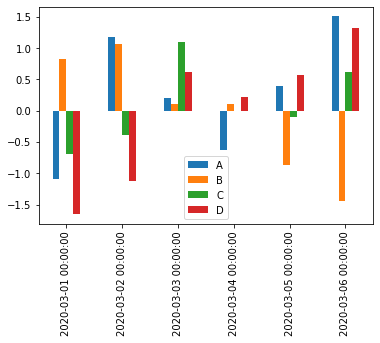

In [70]:
# Pandas 의 API 에서 제공하는 plot 을 사용한 시각화
df.plot(kind='bar')

In [75]:
# CSV : read_csv, to_csv 쓰면 되지만 직접 읽어 올 수 있어야 한다.

In [76]:
input_file = 'dataset/input.csv'
# 옵션(newline='')이 없으면 빈 라인이 추가됨
with open(input_file, 'r', newline='') as reader:
    header = reader.readline()
    #strip() : 문자열 좌우의 공백, 탭, 개행문자 제거
    header = header.strip()
    header_list = header.split(',') # 구분자를 기준으로 리스트로 반환
    print(header_list)
    for row in reader:
        row = row.strip()
        row_list = row.split(',')
        print(row_list)
    

['Supplier Name', 'Invoice Number', 'Part Number', 'Cost', 'Purchase Date']
['A', '001-1001', '2341', '"$500', '000 "', '2014-01-20']
['A', '001-1001', '2341', '"$500', '000 "', '2014-01-20']
['A', '001-1001', '5467', '$750000', '2014-01-20']
['A', '001-1001', '5467', '$750000', '2014-01-20']
['B', '50-9501', '7009', '$250000', '2018-01-30']
['B', '50-9501', '7009', '$250000', '2018-01-30']
['B', '50-9505', '6650', '$125000', '2017-02-03']
['B', '50-9505', '6650', '$125000', '2017-02-03']
['C', '920-4803', '3321', '$615000', '2019-02-03']
['C', '920-4804', '3321', '$615000', '2019-02-10']
['C', '920-4805', '3321', '$615000', '2019-02-17']
['C', '920-4806', '3321', '$615000', '2019-02-24']


In [77]:
input_file = 'dataset/input.csv'
output_file = 'dataset/output.csv'

# 옵션(newline='')이 없으면 빈 라인이 추가됨
with open(input_file, 'r', newline='') as reader:
    with open(output_file, 'w', newline='') as writer:
        header = reader.readline()
        #strip() : 문자열 좌우의 공백, 탭, 개행문자 제거
        header = header.strip()
        header_list = header.split(',') # 구분자를 기준으로 리스트로 반환
        print(header_list)
        for row in reader:
            row = row.strip()
            row_list = row.split(',')
            print(row_list)
            writer.write(','.join(row_list)+'\n')

['Supplier Name', 'Invoice Number', 'Part Number', 'Cost', 'Purchase Date']
['A', '001-1001', '2341', '"$500', '000 "', '2014-01-20']
['A', '001-1001', '2341', '"$500', '000 "', '2014-01-20']
['A', '001-1001', '5467', '$750000', '2014-01-20']
['A', '001-1001', '5467', '$750000', '2014-01-20']
['B', '50-9501', '7009', '$250000', '2018-01-30']
['B', '50-9501', '7009', '$250000', '2018-01-30']
['B', '50-9505', '6650', '$125000', '2017-02-03']
['B', '50-9505', '6650', '$125000', '2017-02-03']
['C', '920-4803', '3321', '$615000', '2019-02-03']
['C', '920-4804', '3321', '$615000', '2019-02-10']
['C', '920-4805', '3321', '$615000', '2019-02-17']
['C', '920-4806', '3321', '$615000', '2019-02-24']


In [78]:
df2 = pd.read_csv('dataset/input.csv')
df2

,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
0,A,001-1001,2341,"$500,000",2014-01-20
1,A,001-1001,2341,"$500,000",2014-01-20
2,A,001-1001,5467,$750000,2014-01-20
3,A,001-1001,5467,$750000,2014-01-20
4,B,50-9501,7009,$250000,2018-01-30
5,B,50-9501,7009,$250000,2018-01-30
6,B,50-9505,6650,$125000,2017-02-03
7,B,50-9505,6650,$125000,2017-02-03
8,C,920-4803,3321,$615000,2019-02-03
9,C,920-4804,3321,$615000,2019-02-10
